Perceptron -> use step function as an activation function (return 1 if h(x) > 1 else 0)

Multi Layer Perceptron (MLP) -> use activation function like sigmoid

**sigmoid function** $$h(x) = \frac{1}{1+e^{-x}}$$

# Step Function

## Using NumPy

In [18]:
import numpy as np

def step_func(X):
    y = X > 0
    return y.astype(np.int64)
step_func(np.array([0.5, -0.5]))
step_func(np.array([1]))


array([1])

## Plot using Matplotlib

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


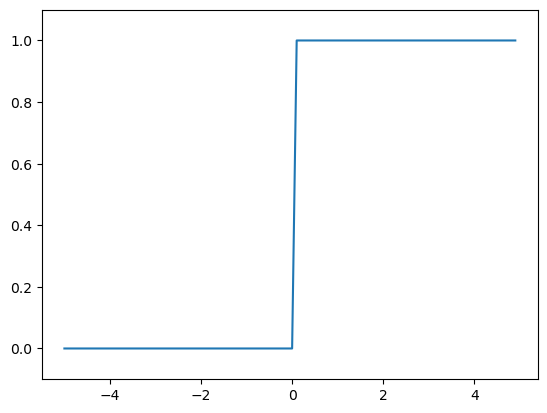

In [19]:
import matplotlib.pylab as plt
X = np.arange(-5.0, 5.0, 0.1)
y = step_func(X)
print(y)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)
plt.show()


MLE:
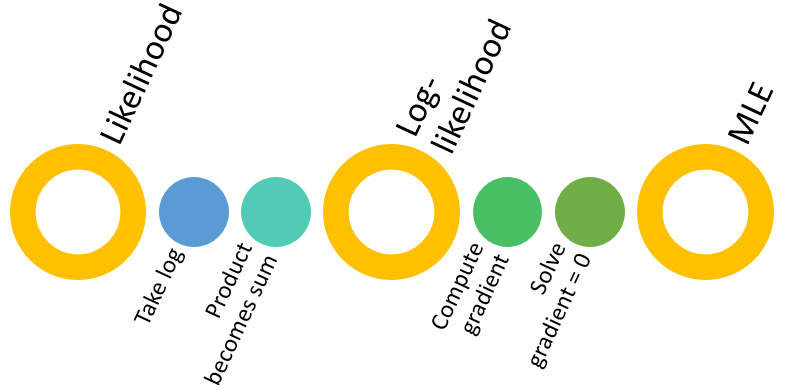

# Sigmoid Function

In [20]:
def sigmoid(X):
    y = 1 / (1 + np.exp(-X))
    return y
sigmoid(np.array([-0.1, 1, 2]))

array([0.47502081, 0.73105858, 0.88079708])

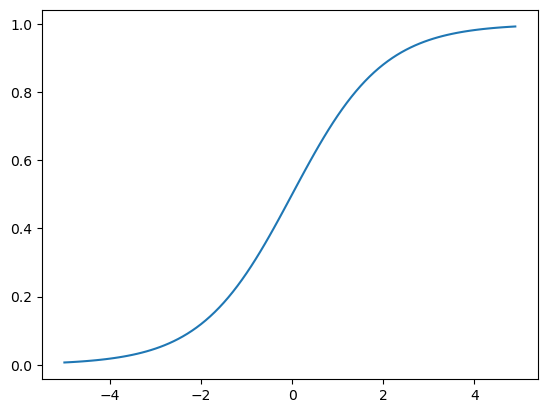

In [21]:
X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.show()

# Rectified Linear Unit (ReLU)

In [32]:
def relu(X):
    return np.maximum(X, 0)

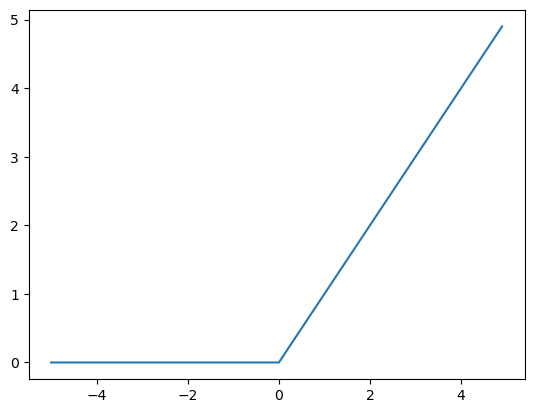

In [33]:
y = relu(X)

plt.plot(X, y)
plt.show()

# Neural Network Implementation

In [49]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, X):
    for i in range(len(network) // 2):
        X = X @ network[f'W{i+1}'] + network[f'b{i+1}']
        
        if i+1 != len(network) // 2:
            X = sigmoid(X) # 1 / 1 + e^(-x)
    Y = X
    return Y

network = init_network()
X = np.array([1.0, 0.5])
Y = forward(network, X)
print(Y)

[0.31682708 0.69627909]


# Softmax Function
$$y_k = \frac{e^{a_k}}{\sum_{i=1}^n e^{a_i}}$$

In [50]:
A, a_sum = np.array([0.3, 2.9, 4.0]), 0

a_sum = np.sum(np.exp(A))
res = np.exp(A) / a_sum
res
    

array([0.01821127, 0.24519181, 0.73659691])

In [60]:
def softmax_func(X):
    return np.exp(X) / np.sum(np.exp(X))

In [52]:
softmax_func(A)

array([0.01821127, 0.24519181, 0.73659691])

## Preventing Overflow
$$y_k = \frac{e^{a_k-C}}{\sum_{i=1}^n e^{a_i-C}} = \frac{e^{a_k}}{\sum_{i=1}^n e^{a_i}}$$

In [58]:
def new_softmax_func(X):
    C = np.max(X)
    return np.exp(X-C) / np.sum(np.exp(X-C))

In [61]:
X = np.array([1010, 1000, 990, 3])
# print(softmax_func(X))
print(softmax_func(X))
print('-----------')
print(new_softmax_func(X))

[nan nan nan  0.]
-----------
[9.99954600e-01 4.53978686e-05 2.06106005e-09 0.00000000e+00]


/var/folders/q9/cj19nh5j5sqfw90mvb1p38rh0000gn/T/ipykernel_82942/2726713676.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(X) / np.sum(np.exp(X))
/var/folders/q9/cj19nh5j5sqfw90mvb1p38rh0000gn/T/ipykernel_82942/2726713676.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(X) / np.sum(np.exp(X))


# MNIST

In [68]:
import sys, os
from mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [70]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = y_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [86]:
import pickle

def get_test_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)
    return x_test, y_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = X @ W1 + b1
    z1 = sigmoid(a1)
    
    a2 = z1 @ W2 + b2
    z2 = sigmoid(a2)
    
    a3 = z2 @ W3 + b3
    z3 = new_softmax_func(a3)
    
    return z3

get_data()
network = init_network()
pred = np.argmax(predict(network, x_test[7])).astype(np.int32)
label = y_test[7]
print(pred, label)

9 9


/var/folders/q9/cj19nh5j5sqfw90mvb1p38rh0000gn/T/ipykernel_82942/2929554382.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-X))


In [93]:
X, Y = get_test_data()
network = init_network()

cnt = 0
for idx in range(len(X)):
    pred = np.argmax(predict(network, X[idx]))
    label = Y[idx]
    if pred == label:
        cnt += 1
        
print(f'Accuracy: {cnt / len(X)}')

/var/folders/q9/cj19nh5j5sqfw90mvb1p38rh0000gn/T/ipykernel_82942/2929554382.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-X))


Accuracy: 0.9207


# Batch Processing

In [92]:
x, _ = get_test_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape,
x[0].shape,
W1.shape,
W2.shape,
W3.shape)


(10000, 784) (784,) (784, 50) (50, 100) (100, 10)


In [99]:
X, Y = get_test_data()
network = init_network()

batch_size = 100
cnt = 0
for idx in range(0, len(X), batch_size):
    X_batch = X[idx:idx+batch_size]
    preds = np.argmax(predict(network, X_batch), axis=1)
    Y_batch = Y[idx:idx+batch_size]
    cnt += np.sum(preds == Y_batch)
    
print(f'Accuracy: {cnt / len(x)}')
    

Accuracy: 0.9207


/var/folders/q9/cj19nh5j5sqfw90mvb1p38rh0000gn/T/ipykernel_82942/2929554382.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-X))
